In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

import os
if not "milligrad" in os.listdir():
    os.chdir('..')

from milligrad import Tensor, Module, Adam, topological_sort
from extras.mnist import load_mnist_data

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = load_mnist_data()

# flattening images and one-hot encoding labels
x_train, x_test = x_train.reshape(-1, 28*28), x_test.reshape(-1, 28*28)
y_train, y_test = np.eye(10)[y_train], np.eye(10)[y_test]

# normalizing
mean, std = x_train.mean(), x_train.std()
x_train, x_test = (x_train - mean) / std, (x_test - mean) / std


In [3]:
from milligrad.tensor import Tensor
        
class MLP(Module):
    def __init__(self):
        super().__init__()
        self.w1 = Tensor.xavier(784, 128)
        self.b1 = Tensor.randn(128)
        self.w2 = Tensor.xavier(128, 10)
        self.b2 = Tensor.randn(10)
        
    def __call__(self, x:Tensor)->Tensor:
        x = (x @ self.w1 + self.b1).relu()
        return x @ self.w2 + self.b2
    
    def parameters(self)->list[Tensor]:
        return [self.w1, self.b1, self.w2, self.b2]

In [4]:
def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

In [10]:
model = MLP()
optim = Adam(model.parameters(), lr=1e-3)

losses = []
accuracies = []
for i in range(100):
    x = Tensor(x_train[:100])
    y = Tensor(y_train[:100])
    y_hat = model(x)
    # This is simply the cross-entropy losss
    loss = -(y * y_hat.log_softmax()).sum(axis=-1).mean()

    losses.append(loss.data)
    accuracies.append(accuracy(y.data, y_hat.data))
    
    optim.zero_grad()
    loss.backward()
    optim.step()
        

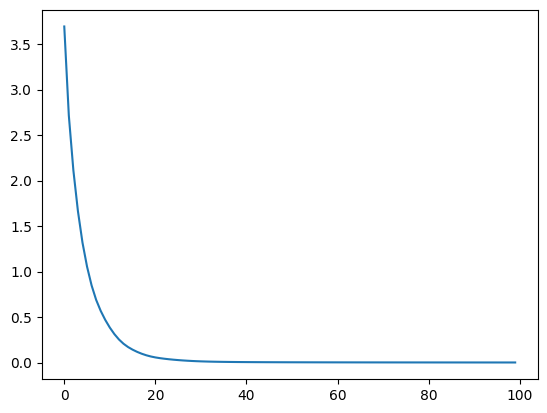

In [11]:
plt.plot(losses)

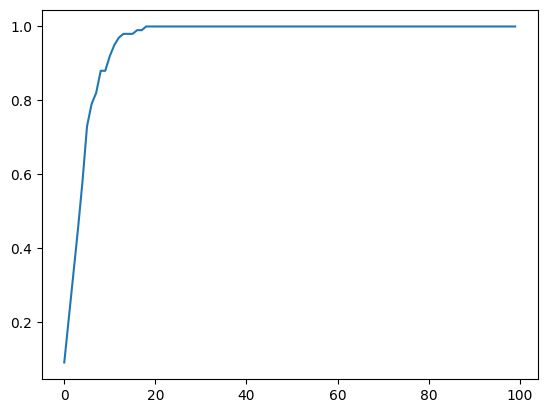

In [12]:
plt.plot(accuracies)

2


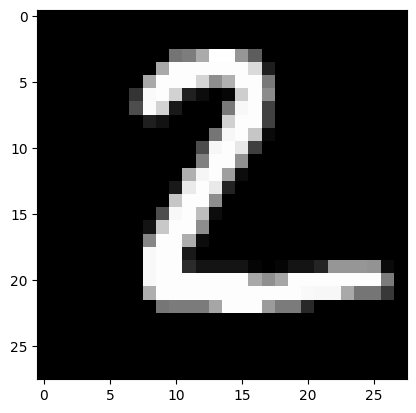

In [8]:
print(model(Tensor(x_test[1])).data.argmax())

plt.imshow(x_test[1].reshape(28, 28), cmap='gray')